In [5]:
#Importing libraries and modules
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
#Load the dataset
data = pd.read_csv('movie.csv')

## Exploratory Data Analysis (EDA  )

In [7]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [8]:
data['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [9]:
# Checking for Duplicate values
data.duplicated().value_counts() # 277 Duplicate entries

data.drop_duplicates(inplace=True) # Dropping Duplicates

In [10]:
#No duplciates now
data.duplicated().sum()

0

In [11]:
#Checking for empty entries
data.notna().value_counts()

text  label
True  True     39723
dtype: int64

In [12]:
#separating the positive and negative reviews, to analyse and furhter for train-test split
pos_rev = data[data['label']==1]
neg_rev = data[data['label']==0]

#The data is clearly not imbalanced
print("No. of Positive Reviews:", len(pos_rev))
print("No of Negative Reviews:", len(neg_rev))

No. of Positive Reviews: 19908
No of Negative Reviews: 19815


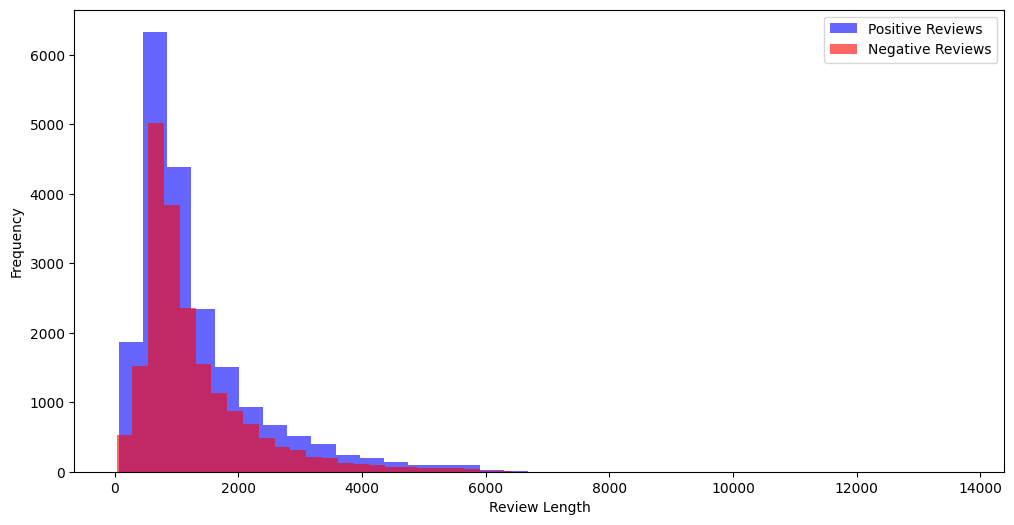

<Axes: xlabel='label', ylabel='count'>

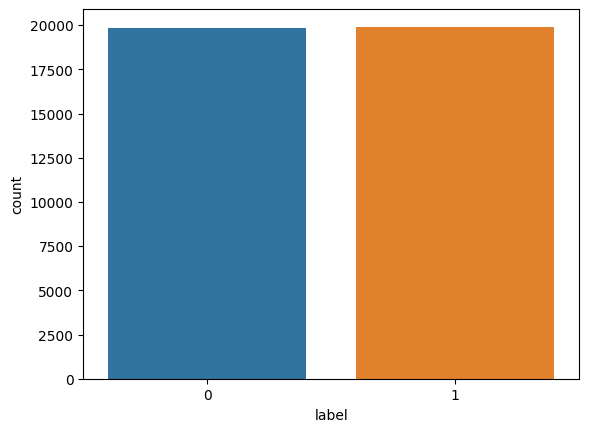

In [13]:
# Data Visualization
# How does the length of the reviews vs the sentiment look like
data['length'] = data['text'].apply(len)
data.head()

# Sentiment vs Length
plt.figure(figsize=(12,6))
data[data['label']==1]['length'].plot(bins=35, kind='hist', color='blue', label='Positive Reviews', alpha=0.6)
data[data['label']==0]['length'].plot(bins=35, kind='hist', color='red', label='Negative Reviews', alpha=0.6)
plt.legend()
plt.xlabel("Review Length")
plt.show()

sns.countplot(x='label', data=data)

# You can also plot the wordclouds (would make more sense after processing the data)

## Data Pre-Processing

In [14]:
# Removing the Stop Words from the data
import string
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

#Making everything in lowercase
data['text'] = data['text'].apply(lambda x: x.lower())

#Removing stopwords
STOPWORDS = stopwords.words('english') #stopword corpus
def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data['text'] = data['text'].apply(lambda text: clean_stopwords(text))

#Removing Special Characters and punctuations
def sp_char_remove(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

data['text'] = data['text'].apply(lambda text: sp_char_remove(text))
# data['text'].head()

#You may apply other processing such as 
#1. Removing URLs(if any)
#2. Removing Numbers
#3. Removing Repeating characters



#Self Exercise:
#Check the lenght of preprocessed reviews and unprocessed reviews
# What is the data reduction here?



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/udbhavagarwal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#Tokenisation
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)
data['text'].head()

0    [grew, b, 1965, watching, loving, thunderbirds...
1    [put, movie, dvd, player, sat, coke, chips, ex...
2    [people, know, particular, time, past, like, f...
3    [even, though, great, interest, biblical, movi...
4    [im, die, hard, dads, army, fan, nothing, ever...
Name: text, dtype: object

In [16]:
#Stemming
st = nltk.PorterStemmer()
def stemming(data):
    text = [st.stem(word) for word in data]
    return data
data['text']= data['text'].apply(lambda x: stemming(x))
data['text'].head()

0    [grew, b, 1965, watching, loving, thunderbirds...
1    [put, movie, dvd, player, sat, coke, chips, ex...
2    [people, know, particular, time, past, like, f...
3    [even, though, great, interest, biblical, movi...
4    [im, die, hard, dads, army, fan, nothing, ever...
Name: text, dtype: object

In [17]:
#Lemmatization
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizing(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data['text']= data['text'].apply(lambda x: lemmatizing(x))
data['text'].head()
    
#Again compare the the length of reviews initials vs after cleaning vs after stemming and lemmatization

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/udbhavagarwal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [grew, b, 1965, watching, loving, thunderbirds...
1    [put, movie, dvd, player, sat, coke, chips, ex...
2    [people, know, particular, time, past, like, f...
3    [even, though, great, interest, biblical, movi...
4    [im, die, hard, dads, army, fan, nothing, ever...
Name: text, dtype: object

In [18]:
#Separating the input and target variables
X=data.text
y=data.label

#Train-text split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9314)

## Feature Extraction

In [19]:
#Vectorization
#1. TF-IDF
input = X_train.apply(lambda x: ' '.join(x) )
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=600000)
vectorizer.fit_transform(input)


<31778x600000 sparse matrix of type '<class 'numpy.float64'>'
	with 5346250 stored elements in Compressed Sparse Row format>

In [20]:
X_train_string = X_train.apply(lambda x: ' '.join(x) )
X_test_string = X_test.apply(lambda x: ' '.join(x))
X_train = vectorizer.transform(X_train_string)
X_test  = vectorizer.transform(X_test_string)

## Model Building



In [18]:
#1. Bernoulli Naive Bayes Classifier
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

NameError: name 'model_Evaluate' is not defined

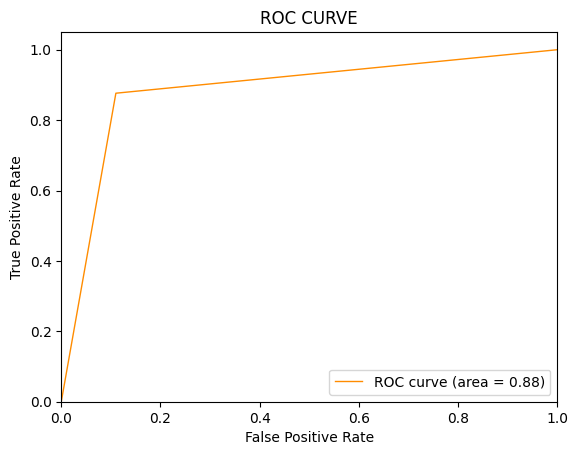

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

/Users/udbhavagarwal/miniconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3979
           1       0.90      0.91      0.90      3966

    accuracy                           0.90      7945
   macro avg       0.90      0.90      0.90      7945
weighted avg       0.90      0.90      0.90      7945



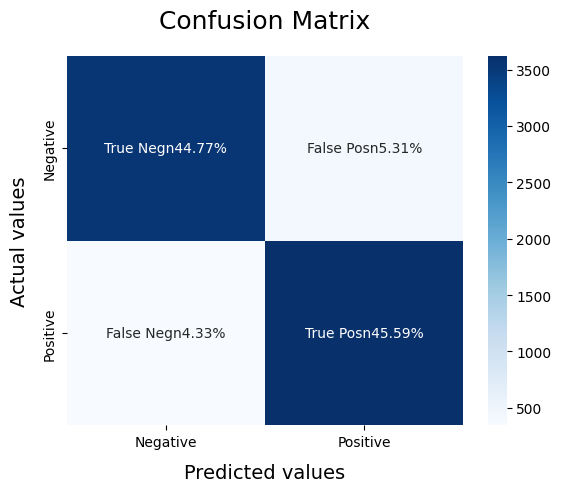

In [ ]:
#2. SVM
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

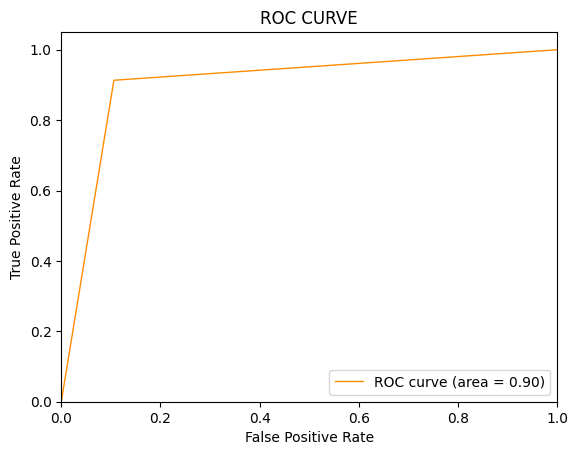

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3979
           1       0.88      0.90      0.89      3966

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



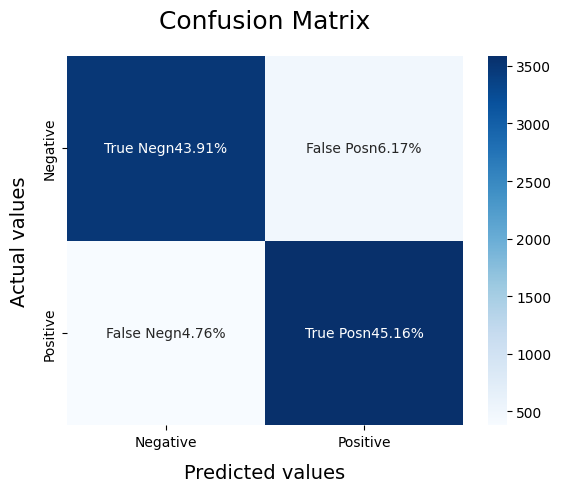

In [ ]:
#3. Logistic Regression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3979
           1       0.86      0.85      0.86      3966

    accuracy                           0.86      7945
   macro avg       0.86      0.86      0.86      7945
weighted avg       0.86      0.86      0.86      7945



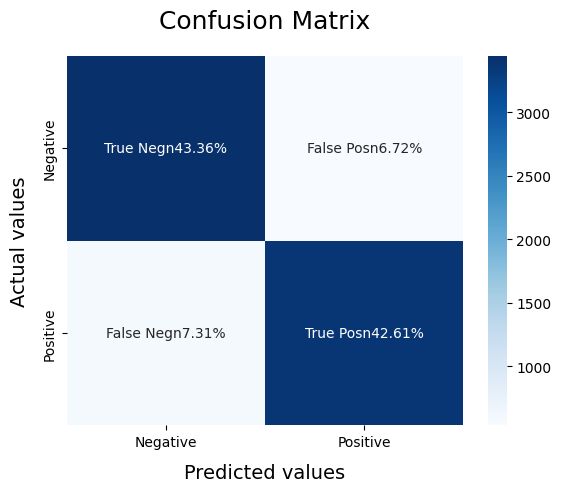

In [90]:
#4. Random Forest
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)
model_Evaluate(RFmodel)
y_pred4 = RFmodel.predict(X_test)

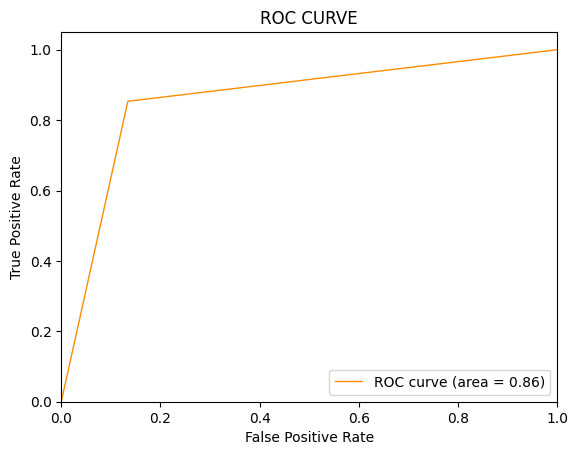

In [91]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [23]:
X_train.shape
X_train_a = X_train.toarray()

In [24]:
#5. Using a Simple Neural Network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train_a,y_train,epochs=100, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3))
model_Evaluate(model)
y_pred5 = model.predict(X_test)



: 

## Evaluation

In [21]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)